In [ ]:

"""
supp:
y'(t) = f(y(t), t)
y(0) = y_0

discret:
y_{i+1} = y_i + \Delta t f(y_i, t_i), i=0,...,N-1
y(0) = y_0
t_{i+1} - t_i = \Delta t

sample 1d function

input: y0
output: 
    y0, y1, ..., yN
    t0, t1, ..., tN

ex. 1
 - f known explicitely - compare...
 - give model data from y

ex. 2
 - f not know ?
"""

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_10305/684250453.py:1: SyntaxWarning: invalid escape sequence '\D'
  """


"\nsupp:\ny'(t) = f(y(t), t)\ny(0) = y_0\n\ndiscret:\ny_{i+1} = y_i + \\Delta t f(y_i, t_i), i=0,...,N-1\ny(0) = y_0\nt_{i+1} - t_i = \\Delta t\n\n\nsample 1d function\n\ninput: y0\noutput: \n    y0, y1, ..., yN\n    t0, t1, ..., tN\n\n\nex. 1\n - f known explicitely - compare...\n - give model data from y\n\nex. 2\n - f not know ?\n"

In [179]:
import torch

In [180]:
f = lambda t: -2*t + 1.2
y = lambda t: -t**2 + 1.2*t + 0.1

def Euler(f, y0, t):
    y = torch.zeros_like(t)
    y[0] = y0
    for i in range(len(t)-1): 
        y[i+1] = y[i] + (t[i+1]-t[i]) * f((t[i+1]+t[i])/2)
    return y

In [181]:
t_min, t_max = 0, 1.5
ss = 0.1
n_timesteps = 20
t_data = torch.linspace(t_min, t_max, n_timesteps)
y_data = y(t_data)

In [182]:
from matplotlib import pyplot as plt

In [183]:
y_euler = Euler(f, y_data[0], t_data)
y_euler

tensor([ 0.1000,  0.1885,  0.2645,  0.3281,  0.3792,  0.4179,  0.4440,  0.4578,
         0.4590,  0.4478,  0.4241,  0.3880,  0.3393,  0.2783,  0.2047,  0.1187,
         0.0202, -0.0907, -0.2141, -0.3500])

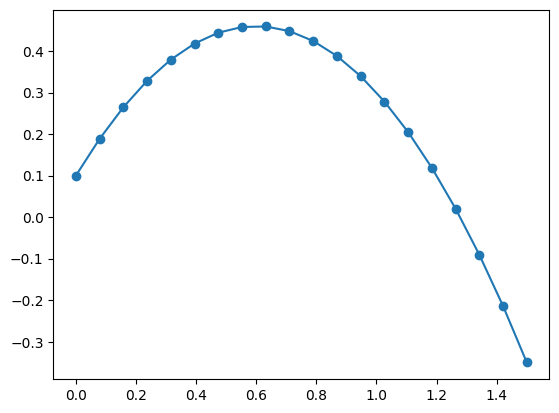

In [184]:
plt.scatter(t_data, y_data)
plt.plot(t_data, y_euler)

In [185]:
n_experiments = 2000
max_err = 0.05
noise = max_err * 2 * (torch.rand(n_experiments, n_timesteps) - 0.5)
Y = noise + y_data

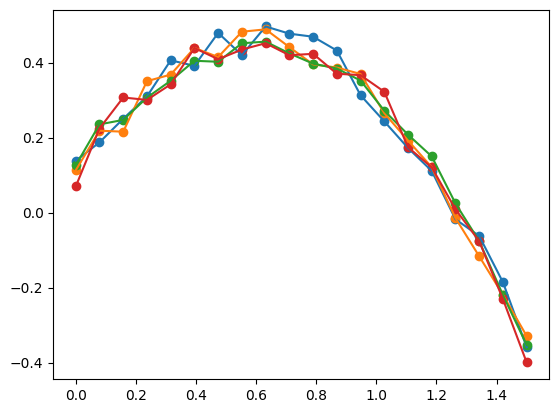

In [186]:
for n in range(1,5):
    plt.scatter(t_data, Y[-n])
    plt.plot(t_data, Y[-n])

dataset: Y = n_experiments x n_timesteps

input:
    for NN: y0
    for ode solver: t_data

output:
    for NN: 

In [187]:
input_size = 1
hidden_size = 10
f_model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, 1),
) # t -> f(t)
f_mod_wrap = lambda x: f_model(torch.tensor([x]))
optimizer = torch.optim.Adam(f_model.parameters(), lr=0.001)

Y_preds = torch.zeros_like(Y)
f_model.train()
for e in range(n_experiments):
    y_exper = Y[e]
    y_euler = Euler(f_mod_wrap, y_exper[0], t_data)

    optimizer.zero_grad() # Clear gradients
    loss = 1/n_timesteps * torch.sum((y_euler - y_exper)**2)
    print(loss)
    loss.backward() # Backpropagation
    optimizer.step() # Update weights
    Y_preds[e] = y_euler

tensor(0.0825, grad_fn=<MulBackward0>)
tensor(0.0772, grad_fn=<MulBackward0>)
tensor(0.0750, grad_fn=<MulBackward0>)
tensor(0.0789, grad_fn=<MulBackward0>)
tensor(0.0782, grad_fn=<MulBackward0>)
tensor(0.0771, grad_fn=<MulBackward0>)
tensor(0.0770, grad_fn=<MulBackward0>)
tensor(0.0802, grad_fn=<MulBackward0>)
tensor(0.0730, grad_fn=<MulBackward0>)
tensor(0.0699, grad_fn=<MulBackward0>)
tensor(0.0724, grad_fn=<MulBackward0>)
tensor(0.0733, grad_fn=<MulBackward0>)
tensor(0.0702, grad_fn=<MulBackward0>)
tensor(0.0812, grad_fn=<MulBackward0>)
tensor(0.0743, grad_fn=<MulBackward0>)
tensor(0.0682, grad_fn=<MulBackward0>)
tensor(0.0722, grad_fn=<MulBackward0>)
tensor(0.0766, grad_fn=<MulBackward0>)
tensor(0.0686, grad_fn=<MulBackward0>)
tensor(0.0707, grad_fn=<MulBackward0>)
tensor(0.0793, grad_fn=<MulBackward0>)
tensor(0.0718, grad_fn=<MulBackward0>)
tensor(0.0784, grad_fn=<MulBackward0>)
tensor(0.0597, grad_fn=<MulBackward0>)
tensor(0.0691, grad_fn=<MulBackward0>)
tensor(0.0782, grad_fn=<M

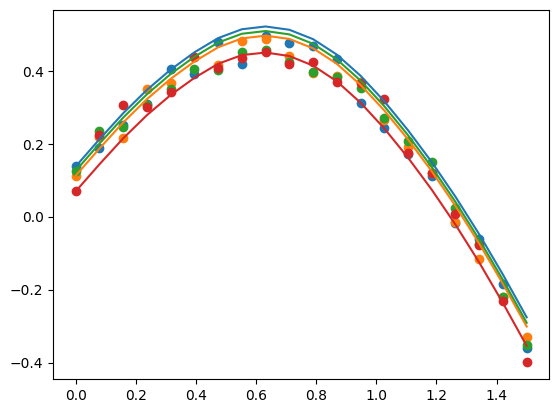

In [188]:
for n in range(1,5):
    plt.scatter(t_data, Y[-n].detach())
    plt.plot(t_data, Y_preds[-n].detach())

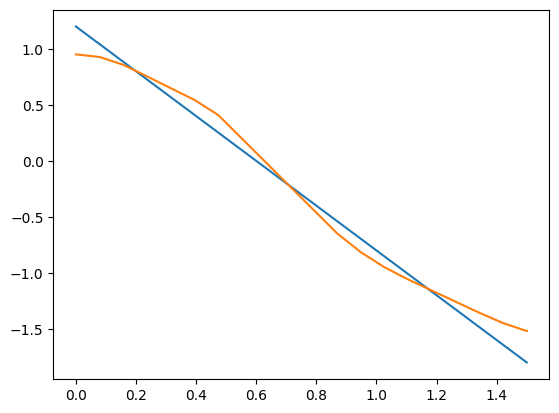

In [189]:
plt.plot(t_data, f(t_data))
plt.plot(t_data, [f_model.forward(torch.tensor([t])).detach() for t in t_data])